In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

In [2]:
X = pd.read_csv('train_data.csv')
X.head(10)

,m_label,strength,italic,m_top,m_left,originalH,originalW,r0c0,r0c1,r0c2,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,8710,0.4,1,35,21,46,39,1,1,1,...,255,255,255,255,255,255,255,255,255,182
1,99,0.4,0,48,23,33,25,1,1,1,...,255,255,225,101,41,1,1,1,1,1
2,835,0.4,0,33,16,13,8,1,1,128,...,1,1,1,1,1,1,1,1,1,1
3,48,0.4,0,0,0,18,11,27,31,49,...,249,247,244,236,212,184,127,94,41,29
4,3653,0.4,0,46,21,50,23,1,1,1,...,1,1,1,1,56,255,255,255,255,255
5,697,0.4,0,37,25,16,7,255,255,255,...,255,255,255,255,73,1,1,1,1,1
6,52,0.4,0,0,0,13,11,40,40,40,...,222,218,222,233,240,249,240,236,157,139
7,195,0.4,1,34,21,60,58,1,1,1,...,1,1,150,255,255,255,255,238,1,1
8,7534,0.4,0,37,19,47,26,1,1,1,...,255,255,229,184,1,1,1,1,1,1
9,653,0.7,1,53,20,31,43,1,1,1,...,255,161,1,1,1,1,1,202,255,255


In [3]:
y = pd.read_csv('train_labels.csv')
y.head(10)

,Font
0,ARIAL
1,TIMES
2,TIMES
3,ARIAL
4,SERIF
5,CAMBRIA
6,ARIAL
7,ARIAL
8,CAMBRIA
9,CALIBRI


In [4]:
X = np.array(X)
y = np.array(y)

print(X)
print(y)
print(X.shape)
print(y.shape)

[[8.710e+03 4.000e-01 1.000e+00 ... 2.550e+02 2.550e+02 1.820e+02]
 [9.900e+01 4.000e-01 0.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [8.350e+02 4.000e-01 0.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 ...
 [7.761e+03 7.000e-01 0.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [3.617e+03 7.000e-01 0.000e+00 ... 1.250e+02 1.250e+02 1.250e+02]
 [1.784e+03 4.000e-01 0.000e+00 ... 2.390e+02 2.550e+02 1.750e+02]]
[['ARIAL']
 ['TIMES']
 ['TIMES']
 ...
 ['SERIF']
 ['TAHOMA']
 ['TAHOMA']]
(65000, 407)
(65000, 1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train, y_test = y_train.ravel(), y_test.ravel()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45500, 407)
(45500,)
(19500, 407)
(19500,)


# Pre-processing

In [6]:
mean = np.zeros((1, X_train.shape[1]))
std = np.ones((1, X_train.shape[1]))


# ====== Your code here ========

# Compute the mean and standard deviation
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# ====== Your code here ========

def transform(X, mean, std):
    # X: n x d matrix
    # mean and std: 1 x d matrix
    # X_out: n x d matrix
    X_out = np.zeros(X.shape)
    # ====== Your code here ========
   
    X_out = (X - mean) / std
   
    # ====== Your code here ========
    return X_out 

X_train_scaled = transform(X_train, mean, std)
X_test_scaled = transform(X_test, mean, std)

print(mean.shape)
print(std.shape)

(407,)
(407,)


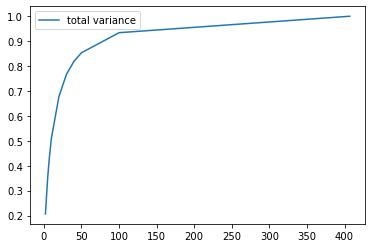

[0.2064169563774239, 0.3500169133707367, 0.42536664015100767, 0.5111807352381456, 0.677941439408873, 0.7669682675983625, 0.8189712082220232, 0.853512869818885, 0.9339854929451443, 1.0]


In [7]:
num_comp = [2,5,7,10,20,30,40,50,100,407]
#========Your code here ======
from sklearn.decomposition import PCA

total_variance_explained = []

for i in num_comp:
    pca = PCA(n_components=i)
    pca.fit(X_train_scaled, y_train)
    total_variance_explained.append(sum(pca.explained_variance_ratio_))
#     if i == 500:
#         singular_values = pca.singular_values_
#==============================
plt.figure(1)
plt.plot(num_comp,total_variance_explained,label='total variance')
plt.legend()
plt.show()
print(total_variance_explained)

# Classifier experiments

In [7]:
pca100 = PCA(n_components=100)
pca100.fit(X_train_scaled, y_train)

pca200 = PCA(n_components=200)
pca200.fit(X_train_scaled, y_train)

PCA(n_components=200)

### KNN with PCA

In [10]:
KNN1 = KNeighborsClassifier(n_neighbors=1)
KNN3 = KNeighborsClassifier(n_neighbors=3)
KNN5 = KNeighborsClassifier(n_neighbors=5)

#### 1 Nearest Neighbor

In [71]:
start_time = time.time()
KNN1.fit(X_train,y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn1 = KNN1.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_knn1, y_test))

Training time 2.966 seconds
Test time 155.021 seconds
0.6357948717948718


In [50]:
start_time = time.time()
KNN1.fit(X_train_scaled,y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn1 = KNN1.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_knn1, y_test))

Training time 3.704 seconds
Test time 435.459 seconds
0.6831282051282052


In [36]:
start_time = time.time()
KNN1.fit(pca100.transform(X_train_scaled),y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn1_pca100 = KNN1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_knn1_pca100, y_test))

Training time 0.624 seconds
Test time 43.287 seconds
0.6757948717948717


In [52]:
start_time = time.time()
KNN1.fit(pca200.transform(X_train_scaled),y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn1_pca200 = KNN1.predict(pca200.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_knn1_pca200, y_test))

Training time 1.093 seconds
Test time 82.222 seconds
0.6795384615384615


#### 3 Nearest Neighbor

In [37]:
start_time = time.time()
KNN3.fit(pca100.transform(X_train_scaled),y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn3_pca100 = KNN3.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_knn3_pca100, y_test))

Training time 0.617 seconds
Test time 83.479 seconds
0.6203076923076923


In [54]:
start_time = time.time()
KNN3.fit(pca200.transform(X_train_scaled),y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn3_pca200 = KNN3.predict(pca200.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 1.112 seconds
Test time 148.963 seconds


#### 5 Nearest Neighbor

In [26]:
start_time = time.time()
KNN5.fit(pca100.transform(X_train_scaled),y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn5_pca100 = KNN5.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

Training time 1.037 seconds
Test time 187.082 seconds


### KNN without PCA

In [ ]:
start_time = time.time()
KNN1 = KNeighborsClassifier(n_neighbors=3)

KNN1.fit(X_train_scaled,y_train
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_knn1 = KNN1.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

### Logistic Regression

In [23]:
start_time = time.time()
clf_lr = LogisticRegression(max_iter=10000)
clf_lr.fit(X_train_scaled,y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_lr = clf_lr.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_lr, y_test))

Training time 13.700 seconds
Test time 0.011 seconds
0.48312820512820515


### Naive Bayes

In [14]:
start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_gnb = gnb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_gnb, y_test))

Training time 0.866 seconds
Test time 0.442 seconds
0.13584615384615384


In [15]:
start_time = time.time()
gnb = MultinomialNB()
gnb.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_gnb = gnb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_gnb, y_test))

Training time 0.177 seconds
Test time 0.011 seconds
0.28112820512820513


### Multi-layer Perceptron

In [61]:
# Multi-layer perceptron with 1 hidden layer

start_time = time.time()
MLP1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=1e-4, solver='sgd', verbose=False, tol=1e-4, random_state=1, learning_rate_init=.1)

MLP1.fit(X_train_scaled,y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_mlp1 = MLP1.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_mlp1, y_test))

Training time 37.924 seconds
Test time 0.041 seconds
0.6761025641025641


In [62]:
# Multi-layer perceptron with 2 hidden layers

start_time = time.time()
MLP1 = MLPClassifier(hidden_layer_sizes=(1000,1000), max_iter=300, alpha=1e-4, solver='sgd', verbose=False, tol=1e-4, random_state=1, learning_rate_init=.1)

MLP1.fit(X_train_scaled,y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_mlp1 = MLP1.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_mlp1, y_test))

Training time 189.624 seconds
Test time 0.513 seconds
0.7192820512820512


In [70]:
# Multi-layer perceptron with 2 hidden layers

start_time = time.time()
MLP1 = MLPClassifier(hidden_layer_sizes=(1000,1000), max_iter=300, alpha=1e-4, solver='sgd', verbose=False, tol=1e-4, random_state=1, learning_rate_init=.1)

MLP1.fit(X_train_scaled,y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_mlp1 = MLP1.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_mlp1, y_test))

Training time 641.613 seconds
Test time 1.121 seconds
0.7532820512820513


In [12]:
# Multi-layer perceptron with 3 hidden layers

start_time = time.time()
MLP1 = MLPClassifier(hidden_layer_sizes=(1000,1000, 1000), max_iter=500, alpha=1e-5, solver='sgd', verbose=False, tol=1e-5, random_state=1, learning_rate_init=.1)

MLP1.fit(X_train_scaled,y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_mlp1 = MLP1.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_mlp1, y_test))

Training time 989.404 seconds
Test time 1.215 seconds
0.7811794871794872


### Support Vector Machine with PCA

In [73]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='poly')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly1_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_poly1_pca100, y_test))

Training time 366.966 seconds
Test time 63.952 seconds
0.7


In [74]:
 start_time = time.time()
clf_svc1 = SVC(C=0.1, kernel='poly',)
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly01_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_poly01_pca100, y_test))

Training time 360.731 seconds
Test time 70.015 seconds
0.47825641025641025


In [75]:
start_time = time.time()
clf_svc1 = SVC(C=10, kernel='poly',)
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly10_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_poly10_pca100, y_test))

Training time 705.322 seconds
Test time 55.595 seconds
0.7686153846153846


In [76]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='linear')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_linear1_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_linear1_pca100, y_test))

Training time 6593.769 seconds
Test time 62.516 seconds
0.4636923076923077


In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=10, kernel='linear')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_linear10_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_linear10_pca100, y_test))

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=0.1, kernel='linear')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_linear01_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_linear01_pca100, y_test))

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='poly')
clf_svc1.fit(pca200.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly1_pca200 = clf_svc1.predict(pca200.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)

In [11]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='rbf')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_rbf1_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_rbf1_pca100, y_test))

Training time 394.791 seconds
Test time 94.758 seconds
0.6996410256410256


In [16]:
start_time = time.time()
clf_svc1 = SVC(C=10, kernel='rbf')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_rbf10_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_rbf1_pca100, y_test))

Training time 627.119 seconds
Test time 70.175 seconds


NameError: name 'y_pred_svc_rbf1_pca100' is not defined

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=10, kernel='rbf')
clf_svc1.fit(pca200.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_rbf10_pca200 = clf_svc1.predict(pca200.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_rbf1_pca200, y_test))

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=0.1, kernel='rbf')
clf_svc1.fit(pca100.transform(X_train_scaled), y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_rbf01_pca100 = clf_svc1.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_rbf01_pca100, y_test))

### Support Vector Machine without PCA

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='poly')
clf_svc1.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly1 = clf_svc1.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_poly1, y_test))

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=10, kernel='poly')
clf_svc1.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly10 = clf_svc1.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_poly10, y_test))

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=0.1, kernel='poly')
clf_svc1.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly01 = clf_svc1.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_poly01, y_test))

In [ ]:
start_time = time.time()
clf_svc1 = SVC(C=1, kernel='poly')
clf_svc1.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_svc_poly1 = clf_svc1.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_svc_poly1, y_test))

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# ====== Your code here ========
clf_svc = SVC(C=1, kernel='poly')
clf_svc.fit(X_train, y_train.ravel())
y_pred_svc = clf_svc.predict(X_test)
# ====== Your code here ========

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# ====== Your code here ========
clf_svc_scaled = SVC(C=1, kernel='poly')
clf_svc_scaled.fit(X_train_scaled, y_train.ravel())
y_pred_svc_scaled = clf_svc.predict(X_test_scaled)
# ====== Your code here ========

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# ====== Your code here ========
clf_svc_scaled = SVC(C=1, kernel='poly')
clf_svc_scaled.fit(X_train_scaled, y_train.ravel())
y_pred_svc_scaled = clf_svc_scaled.predict(X_test_scaled)
# ====== Your code here ========

### Decision Tree Classifier

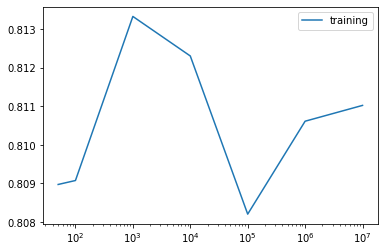

In [68]:
accuracy = []
indices = [50, 100, 1000, 10000, 100000, 1000000, 10000000]
for i in indices:
    print("max_depth %f" % i)
    start_time = time.time()
    clf_tree = DecisionTreeClassifier(max_depth=i)
    clf_tree.fit(X_train, y_train)
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_tree = clf_tree.predict(X_test)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    accuracy.append(accuracy_score(y_pred_tree, y_test))
plt.semilogx(indices, accuracy, label = "training")
plt.legend()    

max_depth 50.000000
Training time 9.682 seconds
Test time 0.033 seconds
max_depth 100.000000
Training time 9.641 seconds
Test time 0.034 seconds
max_depth 1000.000000
Training time 9.681 seconds
Test time 0.021 seconds
max_depth 10000.000000
Training time 9.777 seconds
Test time 0.032 seconds
max_depth 100000.000000
Training time 9.897 seconds
Test time 0.021 seconds
max_depth 1000000.000000
Training time 9.826 seconds
Test time 0.055 seconds
max_depth 10000000.000000
Training time 10.289 seconds
Test time 0.038 seconds


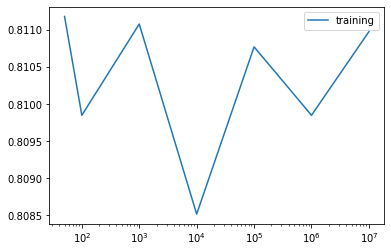

In [69]:
accuracy = []
indices = [50, 100, 1000, 10000, 100000, 1000000, 10000000]
for i in indices:
    print("max_depth %f" % i)
    start_time = time.time()
    clf_tree = DecisionTreeClassifier(max_depth=i)
    clf_tree.fit(X_train, y_train)
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_tree = clf_tree.predict(X_test)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    accuracy.append(accuracy_score(y_pred_tree, y_test))
plt.semilogx(indices, accuracy, label = "training")
plt.legend()    

max_depth 10.000000
Training time 7.098 seconds
Test time 0.039 seconds
max_depth 20.000000
Training time 9.521 seconds
Test time 0.021 seconds
max_depth 30.000000
Training time 9.579 seconds
Test time 0.021 seconds
max_depth 40.000000
Training time 9.597 seconds
Test time 0.034 seconds
max_depth 50.000000
Training time 9.595 seconds
Test time 0.034 seconds
max_depth 100.000000
Training time 9.640 seconds
Test time 0.035 seconds
max_depth 1000.000000
Training time 9.604 seconds
Test time 0.035 seconds
max_depth 10000.000000
Training time 9.588 seconds
Test time 0.033 seconds
max_depth 100000.000000
Training time 9.616 seconds
Test time 0.034 seconds
max_depth 1000000.000000
Training time 9.576 seconds
Test time 0.034 seconds
max_depth 10000000.000000
Training time 9.603 seconds
Test time 0.033 seconds


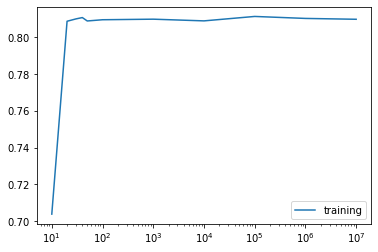

In [72]:
accuracy = []
indices = [10, 20, 30, 40, 50, 100, 1000, 10000, 100000, 1000000, 10000000]
for i in indices:
    print("max_depth %f" % i)
    start_time = time.time()
    clf_tree = DecisionTreeClassifier(max_depth=i)
    clf_tree.fit(X_train, y_train)
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_tree = clf_tree.predict(X_test)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    accuracy.append(accuracy_score(y_pred_tree, y_test))
plt.semilogx(indices, accuracy, label = "training")
plt.legend()    

### Random Forest

In [46]:
start_time = time.time()
clf_bag64 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=64)
clf_bag64.fit(X_train, y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_bag64 = clf_bag64.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_bag64, y_test))

Training time 393.402 seconds
Test time 6.264 seconds
0.8845641025641026


In [55]:
start_time = time.time()
clf_bag64_scaled = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=64)
clf_bag64_scaled.fit(X_train_scaled, y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_bag64_scaled = clf_bag64_scaled.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_bag64_scaled, y_test))

Training time 392.818 seconds
Test time 6.488 seconds
0.8844615384615384


In [49]:
for i in [100, 1000, 3000, 5000]:
    start_time = time.time()
    clf_bag64 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=i), n_estimators=64)
    clf_bag64.fit(X_train, y_train)
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_bag64 = clf_bag64.predict(X_test)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_bag64, y_test))

Training time 395.128 seconds
Test time 6.295 seconds
0.8845128205128205
Training time 409.868 seconds
Test time 6.940 seconds
0.8837948717948718
Training time 411.162 seconds
Test time 8.032 seconds
0.8848205128205128
Training time 405.554 seconds
Test time 6.208 seconds
0.8863076923076924


In [48]:
start_time = time.time()
clf_bag64 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=64)
clf_bag64.fit(pca100.transform(X_train_scaled), y_train)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_bag64_pca100 = clf_bag64.predict(pca100.transform(X_test_scaled))
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_bag64_pca100, y_test))

Training time 336.077 seconds
Test time 1.756 seconds
0.6048205128205129


In [10]:
start_time = time.time()
clf_bag128 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=128)
clf_bag128.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_bag128 = clf_bag128.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_bag128, y_test))

Training time 1167.044 seconds
Test time 28.838 seconds


In [28]:
start_time = time.time()
clf_bag256 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=256)
clf_bag256.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_bag256 = clf_bag256.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_bag256, y_test))

Training time 2305.316 seconds
Test time 16.778 seconds


### Extra Trees

In [7]:
for i in [64, 128, 256, 512]:    
    start_time = time.time()
    clf_et128 = ExtraTreesClassifier(n_estimators=i, random_state=42)
    clf_et128.fit(X_train, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_et128 = clf_et128.predict(X_test)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_et128, y_test))

Training time 18.108 seconds
Test time 0.654 seconds
0.7614871794871795
Training time 35.586 seconds
Test time 1.515 seconds
0.7695384615384615
Training time 69.805 seconds
Test time 2.103 seconds
0.7738461538461539
Training time 137.200 seconds
Test time 6.324 seconds
0.7749230769230769


### AdaBoost

In [22]:
start_time = time.time()
clf_ada128 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=128)
clf_ada128.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()base
y_pred_ada128 = clf_ada128.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_ada128, y_test))

Training time 2096.456 seconds
Test time 6.920 seconds


In [9]:
start_time = time.time()
clf_ada128 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=128)
clf_ada128.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_ada128 = clf_ada128.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_ada128, y_test))

Training time 1453.031 seconds
Test time 4.326 seconds
0.8153333333333334


### Gradient Boosting

In [ ]:
start_time = time.time()
clf_gbc128 = GradientBoostingClassifier(n_estimators=128)
clf_gbc128.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_gbc128 = clf_gbc128.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_gbc128, y_test))

In [10]:
start_time = time.time()
clf_gbc128 = GradientBoostingClassifier(n_estimators=128)
clf_gbc128.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_gbc128 = clf_gbc128.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_gbc128, y_test))

Training time 1661.174 seconds
Test time 0.782 seconds
0.7637435897435897


### Hist-Gradient Boosting

In [ ]:
start_time = time.time()
clf_hgb = HistGradientBoostingClassifier()
clf_hgb.fit(X_train, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_hgb = clf_hgb.predict(X_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_hgb, y_test))

In [11]:
start_time = time.time()
clf_hgb = HistGradientBoostingClassifier()
clf_hgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_hgb = clf_hgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_hgb, y_test))

Training time 75.479 seconds
Test time 0.295 seconds
0.884


### XgBoost

#### softprob vs softmax vs booster=dart: no difference

In [9]:
start_time = time.time()
clf_xgb = XGBClassifier(objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))

Training time 224.640 seconds
Test time 0.714 seconds
0.9015897435897436


In [17]:
start_time = time.time()
clf_xgb = XGBClassifier(objective="multi:softmax", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))

Training time 179.980 seconds
Test time 0.781 seconds
0.9015897435897436


In [18]:
start_time = time.time()
clf_xgb = XGBClassifier(booster="dart", objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))

Training time 190.935 seconds
Test time 0.421 seconds
0.9015897435897436


#### Tweaking max depth: BEST IS 10

In [22]:
for i in [10, 20, 30]:
    start_time = time.time()
    clf_xgb = XGBClassifier(max_depth=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

Training time 302.435 seconds
Test time 0.528 seconds
0.9166666666666666
Training time 406.403 seconds
Test time 0.539 seconds
0.9106666666666666
Training time 443.501 seconds
Test time 0.925 seconds
0.9114871794871795


In [ ]:
for i in range(0,20,2):
    print(i)
    start_time = time.time()
    clf_xgb = XGBClassifier(max_depth=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

0
Training time 9.089 seconds
Test time 0.230 seconds
0.2772307692307692
2
Training time 62.922 seconds
Test time 0.272 seconds
0.7124102564102565
4
Training time 120.944 seconds
Test time 0.393 seconds
0.8463076923076923
6
Training time 183.841 seconds
Test time 0.627 seconds
0.9015897435897436
8
Training time 252.944 seconds
Test time 0.507 seconds
0.914
10
Training time 339.122 seconds
Test time 0.945 seconds
0.9166666666666666
12
Training time 377.577 seconds
Test time 0.634 seconds
0.9144615384615384
14
Training time 389.568 seconds
Test time 0.563 seconds
0.9124102564102564
16


#### Tweaking eta

In [19]:
start_time = time.time()
clf_xgb = XGBClassifier(eta=0.1, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))

Training time 175.416 seconds
Test time 0.414 seconds
0.8541025641025641


In [10]:
for i in [0.2, 0.3, 0.4]:    
    start_time = time.time()
    clf_xgb = XGBClassifier(eta=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

Training time 186.497 seconds
Test time 0.728 seconds
0.8882564102564102
Training time 181.293 seconds
Test time 0.517 seconds
0.9015897435897436
Training time 191.717 seconds
Test time 0.442 seconds
0.9063076923076923


In [11]:
for i in [0.5, 0.7, 1]:    
    start_time = time.time()
    clf_xgb = XGBClassifier(eta=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

Training time 187.500 seconds
Test time 0.439 seconds
0.9068205128205128
Training time 197.042 seconds
Test time 0.463 seconds
0.9063589743589744
Training time 206.363 seconds
Test time 0.720 seconds
0.905025641025641


In [13]:
for i in [0.55, 0.6, 0.65]:
    print(i)
    start_time = time.time()
    clf_xgb = XGBClassifier(eta=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

0.55
Training time 383.644 seconds
Test time 1.126 seconds
0.9063589743589744
0.6
Training time 304.237 seconds
Test time 0.507 seconds
0.9108717948717949
0.65
Training time 193.745 seconds
Test time 0.519 seconds
0.9114358974358975


In [17]:
for i in [0.7]:
    print(i)
    start_time = time.time()
    clf_xgb = XGBClassifier(eta=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

0.7
Training time 187.440 seconds
Test time 0.444 seconds
0.9063589743589744


#### Tweaking gamma

In [14]:
for i in [0.1, 0.2, 0.3]:   
    start_time = time.time()
    clf_xgb = XGBClassifier(gamma=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

Training time 311.273 seconds
Test time 1.018 seconds
0.900051282051282
Training time 364.592 seconds
Test time 0.691 seconds
0.8997435897435897
Training time 357.922 seconds
Test time 0.740 seconds
0.9004102564102564


In [12]:
for i in [0.5, 1]:   
    start_time = time.time()
    clf_xgb = XGBClassifier(gamma=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

Training time 199.486 seconds
Test time 0.748 seconds
0.8995384615384615
Training time 349.792 seconds
Test time 1.004 seconds
0.8975384615384615


In [20]:
start_time = time.time()
clf_xgb = XGBClassifier(gamma=5, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))

Training time 175.099 seconds
Test time 0.413 seconds
0.876


In [21]:
start_time = time.time()
clf_xgb = XGBClassifier(gamma=10, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))

Training time 174.871 seconds
Test time 0.342 seconds
0.8423076923076923


#### Tweaking lambda

In [15]:
for i in [0.9, 1.1]:    
    start_time = time.time()
    clf_xgb = XGBClassifier(reg_lambda=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

Training time 328.231 seconds
Test time 0.633 seconds
0.9005128205128206
Training time 374.796 seconds
Test time 0.688 seconds
0.9009230769230769


In [9]:
for i in [0.95, 0.98, 1.02, 1.05]:    
    start_time = time.time()
    clf_xgb = XGBClassifier(reg_lambda=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

Training time 374.646 seconds
Test time 1.267 seconds
0.9010769230769231
Training time 360.347 seconds
Test time 0.899 seconds
0.8981538461538462
Training time 302.363 seconds
Test time 0.810 seconds
0.9012307692307693
Training time 311.062 seconds
Test time 0.715 seconds
0.9014871794871795


#### Tweaking alpha

In [16]:
for i in [0.1, 0.5, 1]:    
    start_time = time.time()
    clf_xgb = XGBClassifier(reg_alpha=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

Training time 231.749 seconds
Test time 0.496 seconds
0.8996410256410257
Training time 196.597 seconds
Test time 0.459 seconds
0.8991794871794871
Training time 205.284 seconds
Test time 0.427 seconds
0.900974358974359


In [10]:
for i in [0.01, 0.05, 1.5, 2, 3, 5, 7]:    
    print(i)
    start_time = time.time()
    clf_xgb = XGBClassifier(reg_alpha=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

0.01
Training time 351.148 seconds
Test time 0.990 seconds
0.9001025641025641
0.05
Training time 355.846 seconds
Test time 0.857 seconds
0.899948717948718
1.5
Training time 282.497 seconds
Test time 0.797 seconds
0.8964615384615384
2
Training time 328.550 seconds
Test time 0.646 seconds
0.8981025641025641
3
Training time 357.091 seconds
Test time 0.717 seconds
0.8946153846153846
5
Training time 330.759 seconds
Test time 0.718 seconds
0.8916923076923077
7
Training time 283.688 seconds
Test time 0.743 seconds
0.8885128205128205


#### With max depth=10

In [18]:
for i in [0.5, 0.6, 0.7]:
    print(i)
    start_time = time.time()
    clf_xgb = XGBClassifier(max_depth=10, eta=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

0.5
Training time 296.283 seconds
Test time 0.569 seconds
0.9161025641025641
0.6
Training time 291.453 seconds
Test time 0.525 seconds
0.9141538461538462
0.7
Training time 286.158 seconds
Test time 0.537 seconds
0.9113846153846153


In [19]:
for i in [0.4, 0.3, 0.2]:
    print(i)
    start_time = time.time()
    clf_xgb = XGBClassifier(max_depth=10, eta=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

0.4
Training time 294.988 seconds
Test time 0.570 seconds
0.9166153846153846
0.3
Training time 305.023 seconds
Test time 0.520 seconds
0.9166666666666666
0.2
Training time 348.655 seconds
Test time 1.147 seconds
0.9157948717948718


In [8]:
for i in [0.35, 0.25]:
    print(i)
    start_time = time.time()
    clf_xgb = XGBClassifier(max_depth=10, eta=i, objective="multi:softprob", random_state=42)
    clf_xgb.fit(X_train_scaled, y_train.ravel())
    train_time = time.time() - start_time
    print("Training time %.3f seconds" % train_time)

    start_time = time.time()
    y_pred_xgb = clf_xgb.predict(X_test_scaled)
    test_time = time.time() - start_time
    print("Test time %.3f seconds" % test_time)
    print(accuracy_score(y_pred_xgb, y_test))

0.35
Training time 604.028 seconds
Test time 1.254 seconds
0.9160512820512821
0.25
Training time 637.266 seconds
Test time 1.084 seconds
0.9161538461538462


### From the start, test n_estimators

In [12]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=3, n_estimators=100, objective="multi:softprob", random_state=42)
clf_xgb.fit(X_train_scaled, y_train.ravel())
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))

Training time 195.420 seconds
Test time 1.098 seconds
0.7913846153846154


In [7]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=12,
                        objective="multi:softprob",
                        n_estimators=3000,
                        learning_rate = 0.1, random_state=42)
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]
clf_xgb.fit(X_train_scaled, y_train.ravel(), early_stopping_rounds=15, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))
# 240 0.91641

[0]	validation_0-merror:0.09723	validation_0-mlogloss:1.58503	validation_1-merror:0.22082	validation_1-mlogloss:1.61459
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 15 rounds.
[1]	validation_0-merror:0.07415	validation_0-mlogloss:1.42127	validation_1-merror:0.19528	validation_1-mlogloss:1.47463
[2]	validation_0-merror:0.06084	validation_0-mlogloss:1.28429	validation_1-merror:0.17867	validation_1-mlogloss:1.35867
[3]	validation_0-merror:0.05514	validation_0-mlogloss:1.16775	validation_1-merror:0.17067	validation_1-mlogloss:1.25968
[4]	validation_0-merror:0.05075	validation_0-mlogloss:1.06828	validation_1-merror:0.16600	validation_1-mlogloss:1.17590
[5]	validation_0-merror:0.04576	validation_0-mlogloss:0.97950	validation_1-merror:0.15862	validation_1-mlogloss:1.10100
[6]	validation_0-merror:0.04283	validation_0-mlogloss:0.90165	validation_1-merror:0.15431	validation_1-mlogloss:1

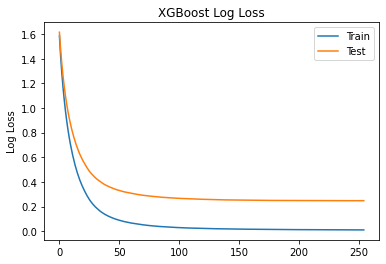

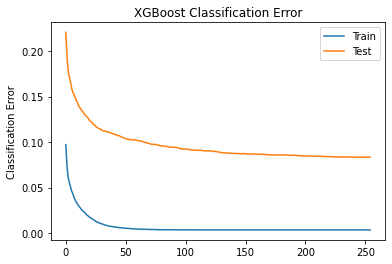

In [8]:
# retrieve performance metrics
results = clf_xgb.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [9]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=12,
                        objective="multi:softprob",
                        n_estimators=3000,
                        learning_rate = 0.3, random_state=42)
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]
clf_xgb.fit(X_train_scaled, y_train.ravel(), early_stopping_rounds=15, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))
# 88 0.91364

[0]	validation_0-merror:0.09723	validation_0-mlogloss:1.21578	validation_1-merror:0.22082	validation_1-mlogloss:1.30260
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 15 rounds.
[1]	validation_0-merror:0.06070	validation_0-mlogloss:0.91679	validation_1-merror:0.17897	validation_1-mlogloss:1.05072
[2]	validation_0-merror:0.04413	validation_0-mlogloss:0.71913	validation_1-merror:0.16467	validation_1-mlogloss:0.88930
[3]	validation_0-merror:0.03461	validation_0-mlogloss:0.57692	validation_1-merror:0.15195	validation_1-mlogloss:0.77067
[4]	validation_0-merror:0.02855	validation_0-mlogloss:0.46942	validation_1-merror:0.14446	validation_1-mlogloss:0.68068
[5]	validation_0-merror:0.02363	validation_0-mlogloss:0.38740	validation_1-merror:0.13733	validation_1-mlogloss:0.60971
[6]	validation_0-merror:0.01956	validation_0-mlogloss:0.32082	validation_1-merror:0.12995	validation_1-mlogloss:0

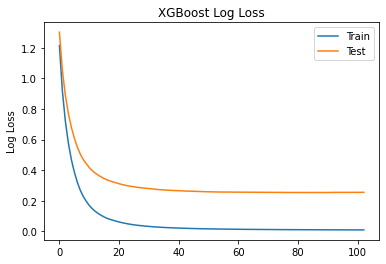

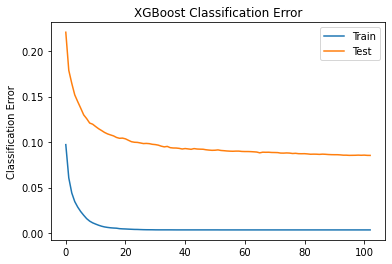

In [10]:
# retrieve performance metrics
results = clf_xgb.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = pvlt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [8]:
start_time = time.time()
clf_xgb = XGBClassifier(max_depth=12,
                        objective="multi:softprob",
                        n_estimators=4000,
                        learning_rate = 0.05, random_state=42)
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]
clf_xgb.fit(X_train_scaled, y_train.ravel(), early_stopping_rounds=30, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=False)
train_time = time.time() - start_time
print("Training time %.3f seconds" % train_time)

start_time = time.time()
y_pred_xgb = clf_xgb.predict(X_test_scaled)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print(accuracy_score(y_pred_xgb, y_test))

Training time 5705.384 seconds
Test time 4.492 seconds
0.9168717948717948


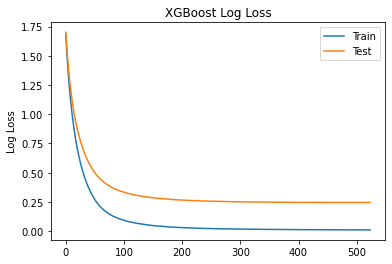

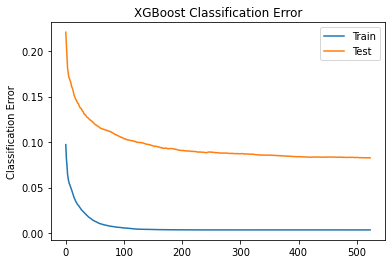

In [9]:
# retrieve performance metrics
results = clf_xgb.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

# Export

In [34]:
from numpy import savetxt

# abc = np.vstack(np.arange(y_pred.shape[0]))
# output = np.hstack((abc, np.vstack(y_pred)))
# y_pred_v = np.vstack(y_pred)
# print(y_pred_v)


#savetxt('./data.csv', output, delimiter=',')

# df = pd.DataFrame(output)
# df.to_csv('data.csv',index=False, header=['ID', 'Font'])

sample_submission = pd.read_csv('./sample_submission.csv')

out = pd.DataFrame({'ID': sample_submission.ID,'Font': clf_bag64_pca100})
out.to_csv('data.csv', index=False)